<a href="https://colab.research.google.com/github/siri2511/Deep-Learning/blob/main/Names_Classification_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


Sample names and labels from the dataset:
Name:Thatch,Label:Male
Name:Agustin,Label:Male
Name:Karalynn,Label:Female
Name:Jessica,Label:Female
Name:Enrika,Label:Female
Name:Skipper,Label:Male
Name:Halimeda,Label:Female
Name:Georgiamay,Label:Female
Name:Sharla,Label:Female
Name:Rogers,Label:Male
[[8, 13, 1, 8, 14, 13], [1, 17, 16, 9, 8, 3, 4], [18, 1, 5, 1, 6, 12, 4, 4], [19, 2, 9, 9, 3, 14, 1], [2, 4, 5, 3, 18, 1], [9, 18, 3, 22, 22, 2, 5], [13, 1, 6, 3, 11, 2, 10, 1], [17, 2, 7, 5, 17, 3, 1, 11, 1, 12], [9, 13, 1, 5, 6, 1], [5, 7, 17, 2, 5, 9], [14, 1, 11, 2, 6, 6, 3, 1], [15, 6, 3, 4, 4, 12], [9, 13, 2, 6, 1, 17, 13], [11, 1, 16, 5, 3, 2], [6, 3, 9, 9, 12], [19, 7, 2, 6, 6, 2], [17, 2, 5, 13, 1, 5, 10, 3, 4, 2], [21, 1, 8, 3, 11, 1], [23, 3, 4, 4, 3, 2], [19, 7, 27, 1, 4, 4], [1, 6, 6, 12, 4], [11, 16, 5, 2, 3, 6], [8, 13, 2, 7], [11, 3, 17, 4, 7, 4, 4, 2], [6, 1, 16, 5, 2, 8, 8, 1], [14, 7, 5, 4, 2, 6, 6, 3, 9], [13, 1, 6, 6, 2, 12], [11, 1, 5, 3, 1, 4, 4, 2], [18, 1, 8, 13, 1, 5, 3,

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
159/159 - 12s - 76ms/step - accuracy: 0.6318 - loss: 0.6422 - val_accuracy: 0.6994 - val_loss: 0.5837
Epoch 2/10
159/159 - 4s - 25ms/step - accuracy: 0.7343 - loss: 0.5593 - val_accuracy: 0.7608 - val_loss: 0.5234
Epoch 3/10
159/159 - 2s - 15ms/step - accuracy: 0.7752 - loss: 0.5005 - val_accuracy: 0.7773 - val_loss: 0.4868
Epoch 4/10
159/159 - 3s - 20ms/step - accuracy: 0.7868 - loss: 0.4647 - val_accuracy: 0.7915 - val_loss: 0.4567
Epoch 5/10
159/159 - 3s - 17ms/step - accuracy: 0.7929 - loss: 0.4438 - val_accuracy: 0.7687 - val_loss: 0.4716
Epoch 6/10
159/159 - 2s - 12ms/step - accuracy: 0.8082 - loss: 0.4228 - val_accuracy: 0.7781 - val_loss: 0.4725
Epoch 7/10
159/159 - 2s - 11ms/step - accuracy: 0.8074 - loss: 0.4189 - val_accuracy: 0.7931 - val_loss: 0.4358
Epoch 8/10
159/159 - 3s - 16ms/step - accuracy: 0.8076 - loss: 0.4182 - val_accuracy: 0.7962 - val_loss: 0.4334
Epoch 9/10
159/159 - 2s - 10ms/step - accuracy: 0.8210 - loss: 0.3963 - val_accuracy: 0.7946 - val_loss

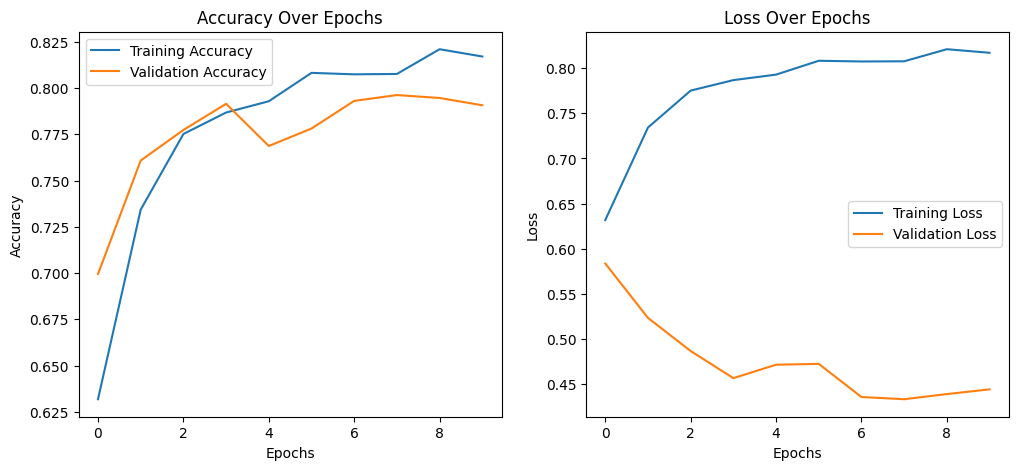

In [1]:
import nltk
from nltk.corpus import names
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
nltk.download('names')
male_names=[(name,0)for name in names.words('male.txt')]
female_names=[(name,1)for name in names.words('female.txt')]
all_names=male_names+female_names
random.shuffle(all_names)
names_data=[name for name,label in all_names]
labels_data=[label for name,label in all_names]
print("Sample names and labels from the dataset:")
for i in range(10):
  print(f"Name:{names_data[i]},Label:{'Male'if labels_data[i]==0 else 'Female'}")
tokenizer=Tokenizer(char_level=True)
tokenizer.fit_on_texts(names_data)
sequences=tokenizer.texts_to_sequences(names_data)
print(sequences)
max_length=max([len(seq) for seq in sequences])
X=pad_sequences(sequences,maxlen=max_length,padding='post')
print(X)
y=tf.keras.utils.to_categorical(labels_data,num_classes=2)
print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=3,input_length=max_length),
    SimpleRNN(64,activation='relu'),Dense(2,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=2)
test_loss,test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"Test Loss:{test_loss:.4f},Test Accuracy:{test_accuracy:.4f}")
new_names=['John','Marie','Sita','Pierre']
new_sequences=tokenizer.texts_to_sequences(new_names)
new_X=pad_sequences(new_sequences,maxlen=max_length,padding='post')
predictions=model.predict(new_X)
for i,name in enumerate(new_names):
  gender='Male' if np.argmax(predictions[i])==0 else 'Female'
  print(f"Name:{name},Predicted Gender:{gender}")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
